# Explore the consensus accuracy for each amplicon using the 3D7 control sample
---


In [28]:
import os
import sys
import configparser
import getopt
import numpy as np
import pandas as pd
from collections import Counter

from lib.error import *

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# inline stylization
%matplotlib inline
sns.set_style('white')
sns.set_style('ticks')
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150
plt.rcParams['figure.figsize'] = [4, 4]

## 0 Settings

In [30]:
expt_dir = "../analysis/ont/zambia/2019-04-10"  # experiment of interest
cntrl_sample = "BC05"  # 3d7 sample

If `save_figs` is set to `True`, then figures are automatically saved as `.png` under `../figs`, as well as visualized in the notebook.

In [31]:
save_figs = True
fig_dir = expt_dir.replace("analysis", "figs")
if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)

In [32]:
print("Make Figures:", save_figs)
print("Figure path:", fig_dir)

Make Figures: True
Figure path: ../figs/ont/zambia/2019-04-10


## 1 By Gene

In [33]:
def plot_consensus(df, gene_name, ax, cols, label=True):
    """
    Plot the consensus accuracy for a given
    `gene_name` from a crosstable
    
    """
    
    sites_correct = sum([row[base] for base,row in df.iterrows()])
    total_sites = df.sum().sum()
    identity = "%d/%d (%.02f%%)" % (sites_correct,
                                    total_sites,
                                    100*sites_correct/total_sites)
    
    # Plot
    df.plot(kind="bar", 
            stacked=True,
            color=cols,
            ax=ax)
    
    if label:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
        ax.set_title("%s \n %s" % (gene_name, identity))
        ax.set_ylabel("Number of Sites")
        ax.set_xlabel("Reference Nucleotide")
        ax.legend(bbox_to_anchor=(1, 1), ncol=1, frameon=True, title="Consensus Call")

### 1a $KELCH13$

In [34]:
cntrl_fn = cntrl_sample + ".KELCH13.reverse.nt_error.csv"
cntrl_path = os.path.join(expt_dir, cntrl_fn)

In [35]:
error_df = pd.read_csv(cntrl_path)
error_df = convert_to_frequencies(error_df, "total", ["position", "ref", "total"])

In [36]:
error_df.head()

,position,ref,total,A,T,C,G,-,+,SNV,error
0,0,A,10159,0.863176,0.001280,0.001673,0.014076,0.108967,0.010828,0.017029,0.136824
1,1,T,9449,0.002646,0.935020,0.005186,0.002963,0.045190,0.008996,0.010795,0.064980
2,2,G,9643,0.004874,0.002385,0.001556,0.937882,0.043555,0.009748,0.008815,0.062118
3,3,G,9396,0.003299,0.005960,0.001384,0.935930,0.048212,0.005215,0.010643,0.064070
4,4,A,9780,0.927812,0.002658,0.001227,0.005930,0.044785,0.017587,0.009816,0.072188


In [37]:
error_df["call"] = error_df[["A", "T", "C", "G", "-", "+"]].idxmax(1)

In [38]:
error_df.query("call == '+'")  # there are no consensus insertions

,position,ref,total,A,T,C,G,-,+,SNV,error,call


In [39]:
consensus = pd.crosstab(index=error_df["ref"], columns=error_df["call"])
consensus = consensus.reindex(["A", "T", "C", "G"])[["A", "T", "C", "G", "-"]]

In [40]:
consensus

call,A,T,C,G,-
ref,,,,,
A,891,0,0,0,9
T,0,696,0,0,1
C,0,0,212,0,0
G,0,0,0,372,0


In [41]:
cols = sns.color_palette(sns.color_palette("Paired", 4) + ["grey"])

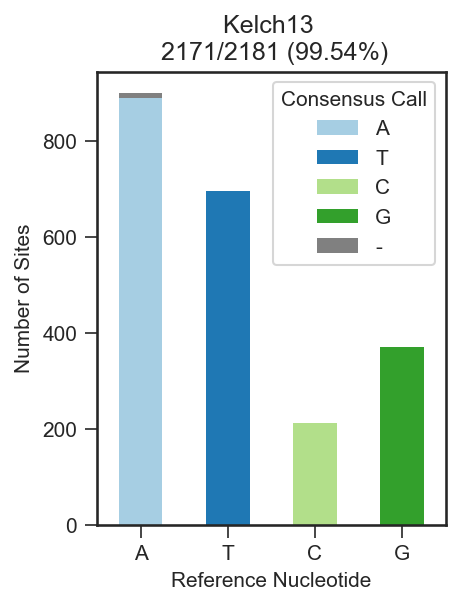

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(3, 4))
plot_consensus(consensus, "Kelch13", ax=ax, cols=cols)

if save_figs:
    fig.savefig(os.path.join(fig_dir, "consensus_kelch13.png"),
                bbox_inches="tight", pad_inches=0.5)

### 1b $DHFR$

In [43]:
cntrl_fn = cntrl_sample + ".DHFR.nt_error.csv"
cntrl_path = os.path.join(expt_dir, cntrl_fn)

In [44]:
error_df = pd.read_csv(cntrl_path)
error_df = convert_to_frequencies(error_df, "total", ["position", "ref", "total"])

In [45]:
error_df.head()

,position,ref,total,A,T,C,G,-,+,SNV,error
0,0,A,8312,0.919755,0.002767,0.004451,0.015881,0.051853,0.005294,0.023099,0.080245
1,1,T,8288,0.008808,0.926520,0.011100,0.003378,0.041023,0.009170,0.023287,0.073480
2,2,G,8209,0.002315,0.001827,0.003776,0.956998,0.031429,0.003655,0.007918,0.043002
3,3,A,8231,0.958207,0.003645,0.001944,0.008140,0.018953,0.009112,0.013729,0.041793
4,4,T,8522,0.000587,0.932058,0.005985,0.002347,0.041422,0.017602,0.008918,0.067942


In [46]:
error_df["call"] = error_df[["A", "T", "C", "G", "-", "+"]].idxmax(1)

In [47]:
error_df.query("call == '+'")  # there are no consensus insertions

,position,ref,total,A,T,C,G,-,+,SNV,error,call


In [48]:
consensus = pd.crosstab(index=error_df["ref"], columns=error_df["call"])
consensus = consensus.reindex(["A", "T", "C", "G"])[["A", "T", "C", "G", "-"]]

In [49]:
consensus

call,A,T,C,G,-
ref,,,,,
A,747,0,0,0,6
T,0,611,0,0,0
C,0,0,171,0,0
G,0,0,0,291,1


In [50]:
cols = sns.color_palette(sns.color_palette("Paired", 4) + ["grey"])

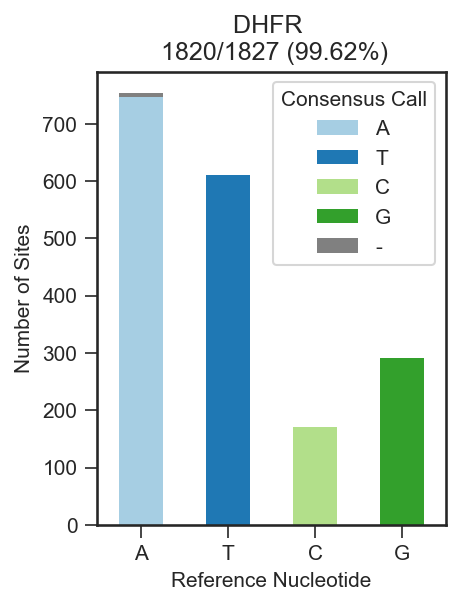

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(3, 4))
plot_consensus(consensus, "DHFR", ax=ax, cols=cols)

if save_figs:
    fig.savefig(os.path.join(fig_dir, "consensus_dhfr.png"),
                bbox_inches="tight", pad_inches=0.5)

### 1c $CRT1$

Note that for $CRT1$, we do not have the full gene.

In [52]:
cntrl_fn = cntrl_sample + ".CRT.nt_error.csv"
cntrl_path = os.path.join(expt_dir, cntrl_fn)

In [53]:
error_df = pd.read_csv(cntrl_path)
error_df = convert_to_frequencies(error_df, "total", ["position", "ref", "total"])

In [54]:
error_df.query("total > 1", inplace=True)  # Limit to regions with coverage

In [55]:
error_df.head()

,position,ref,total,A,T,C,G,-,+,SNV,error
0,0,A,8248,0.938046,0.006547,0.004122,0.012245,0.031887,0.007153,0.022915,0.061954
1,1,T,8495,0.007298,0.905238,0.008476,0.005533,0.055915,0.017540,0.021307,0.094762
2,2,G,8840,0.009955,0.003620,0.006222,0.859615,0.110633,0.009955,0.019796,0.140385
3,3,A,8187,0.882741,0.005374,0.004275,0.011237,0.090143,0.006229,0.020887,0.117259
4,4,A,8328,0.930716,0.003842,0.003722,0.011888,0.043348,0.006484,0.019452,0.069284


In [56]:
error_df["call"] = error_df[["A", "T", "C", "G", "-", "+"]].idxmax(1)

In [57]:
error_df.query("call == '+'")  # there are no consensus insertions

,position,ref,total,A,T,C,G,-,+,SNV,error,call


In [58]:
consensus = pd.crosstab(index=error_df["ref"], columns=error_df["call"])
consensus = consensus.reindex(["A", "T", "C", "G"])[["A", "T", "C", "G", "-"]]

In [59]:
consensus

call,A,T,C,G,-
ref,,,,,
A,312,0,0,0,4
T,0,339,0,0,0
C,0,0,115,0,0
G,0,0,0,127,0


In [60]:
cols = sns.color_palette(sns.color_palette("Paired", 4) + ["grey"])

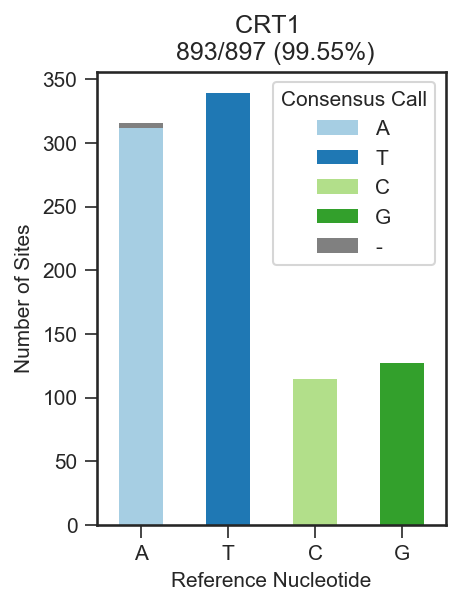

In [61]:
fig, ax = plt.subplots(1, 1, figsize=(3, 4))
plot_consensus(consensus, "CRT1", ax=ax, cols=cols)

if save_figs:
    fig.savefig(os.path.join(fig_dir, "consensus_crt.png"),
                bbox_inches="tight", pad_inches=0.5)

### 1d $MSP2$

In [62]:
cntrl_fn = cntrl_sample + ".MSP2.reverse.nt_error.csv"
cntrl_path = os.path.join(expt_dir, cntrl_fn)

In [63]:
error_df = pd.read_csv(cntrl_path)
error_df = convert_to_frequencies(error_df, "total", ["position", "ref", "total"])

In [64]:
error_df.query("total > 1", inplace=True)  # Limit to regions with coverage

In [65]:
error_df.head()

,position,ref,total,A,T,C,G,-,+,SNV,error
0,0,A,8232,0.812318,0.006803,0.006560,0.002915,0.166059,0.005345,0.016278,0.187682
1,1,T,9802,0.007243,0.800041,0.004285,0.001938,0.144766,0.041726,0.013467,0.199959
2,2,G,8586,0.013394,0.003843,0.001514,0.901118,0.044375,0.035756,0.018751,0.098882
3,3,A,8369,0.933086,0.003107,0.002270,0.010873,0.042538,0.008125,0.016250,0.066914
4,4,A,8350,0.891617,0.007665,0.000958,0.011257,0.074611,0.013892,0.019880,0.108383


In [66]:
error_df["call"] = error_df[["A", "T", "C", "G", "-", "+"]].idxmax(1)

In [67]:
error_df.query("call == '+'")  # there are no consensus insertions

,position,ref,total,A,T,C,G,-,+,SNV,error,call


In [68]:
consensus = pd.crosstab(index=error_df["ref"], columns=error_df["call"])
consensus = consensus.reindex(["A", "T", "C", "G"])[["A", "T", "C", "G", "-"]]

In [69]:
consensus

call,A,T,C,G,-
ref,,,,,
A,304,0,0,0,0
T,0,215,0,0,0
C,0,0,155,0,1
G,0,0,0,144,0


In [70]:
cols = sns.color_palette(sns.color_palette("Paired", 4) + ["grey"])

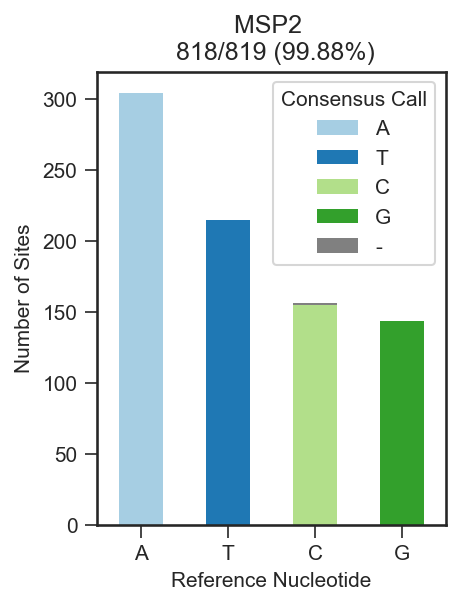

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(3, 4))
plot_consensus(consensus, "MSP2", ax=ax, cols=cols)

if save_figs:
    fig.savefig(os.path.join(fig_dir, "consensus_msp2.png"),
                bbox_inches="tight", pad_inches=0.5)